In [1]:
/content/drive/MyDrive/my-shared-folder/Information_Technology_Fundamental_shared/castelli_eda_lr_rf.ipynb

NameError: name 'content' is not defined

In [2]:
# Building ML settings
# %cd /content/drive/MyDrive/Colab otebooks/class/project
# %pwd
!pip install matminer seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set universal theme for figures
plt.style.use('seaborn-v0_8')
# Configure plot settings
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = True
# Set numerical precision
np.set_printoptions(precision=5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 13.7 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=4354

In [3]:
# Load dataset
from matminer.datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = load_dataset("castelli_perovskites")
df.head()

Fetching castelli_perovskites.json.gz from https://ndownloader.figshare.com/files/13284197 to /usr/local/lib/python3.11/dist-packages/matminer/datasets/castelli_perovskites.json.gz


Fetching https://ndownloader.figshare.com/files/13284197 in MB: 4.9479679999999995MB [00:00, 309.56MB/s]               


fermi level  fermi width  e_form  gap is direct  \
0     0.312138     0.001837    2.16           True   
1     0.297083     0.001837    1.52           True   
2     0.191139     0.003675    1.48           True   
3     0.316346     0.001837    1.24           True   
4     0.312658     0.003675    0.62           True   

                                           structure          mu_b  formula  \
0  [[0. 0. 0.] Rh, [1.97727 1.97727 1.97727] Te, ...  1.974478e-02   RhTeN3   
1  [[2.54042 0.      0.     ] Hf, [1.02039 2.1447... -2.253054e-05   HfTeO3   
2  [[0.60791 0.      0.     ] Re, [2.18661 2.1463...  4.982109e+00  ReAsO2F   
3  [[2.83091 0.      0.     ] W, [2.65735 2.09187... -8.684496e-01   WReO2S   
4  [[0.00519 0.      0.     ] Bi, [2.17266 2.1405...  2.164069e-15  BiHfO2F   

        vbm       cbm  gap gllbsc  
0  6.187694  6.187694         0.0  
1  6.033125  6.033125         0.0  
2  6.602253  6.602253         0.0  
3  5.738462  5.738462         0.0  
4  6.074736  6.074736         0.0

In [4]:
from pymatgen.core import Composition

df["composition"] = df["formula"].apply(Composition)

In [5]:
from matminer.featurizers.composition import ElementProperty
from tqdm import tqdm

tqdm.pandas()
featurizer = ElementProperty.from_preset("magpie", impute_nan=True)
df_feature = featurizer.featurize_dataframe(df, col_id="composition", ignore_errors=True)

ElementProperty:   0%|          | 0/18928 [00:00<?, ?it/s]

In [6]:
df = df_feature

In [7]:
# 欠損値を含む行を削除
before_drop = df.shape[0]
df = df.dropna(axis=0)
after_drop = df.shape[0]

print(f"Removed {before_drop - after_drop} rows with missing values")

Removed 0 rows with missing values


In [8]:
# 特殊型（非ハッシュ可能）の列を一時的に除外
non_hashable_cols = ["structure"]
df_hashable = df.drop(columns=non_hashable_cols)

# ✅ 定数列の削除
constant_cols = [col for col in df_hashable.columns if df_hashable[col].nunique(dropna=False) <= 1]
df = df.drop(columns=constant_cols)
print(f"🧹 Removed {len(constant_cols)} constant features")
print(constant_cols)

# 🔁 df_hashable を更新（定数列を除いた状態に）
df_hashable = df.drop(columns=non_hashable_cols)

# ✅ ユニーク数が3以下の列を再判定
low_unique_cols = [col for col in df_hashable.columns if df_hashable[col].nunique() <= 3]

df = df.drop(columns=low_unique_cols)
print(f"🧹 Removed {len(low_unique_cols)} low-unique features (Unique <= 3)")
print(low_unique_cols)


🧹 Removed 13 constant features
['MagpieData minimum Row', 'MagpieData maximum NsValence', 'MagpieData minimum NdValence', 'MagpieData minimum NfValence', 'MagpieData minimum NsUnfilled', 'MagpieData minimum NdUnfilled', 'MagpieData minimum NfUnfilled', 'MagpieData maximum NfUnfilled', 'MagpieData range NfUnfilled', 'MagpieData mean NfUnfilled', 'MagpieData avg_dev NfUnfilled', 'MagpieData mode NfUnfilled', 'MagpieData minimum GSmagmom']
🧹 Removed 18 low-unique features (Unique <= 3)
['fermi width', 'gap is direct', 'MagpieData minimum MeltingT', 'MagpieData maximum Column', 'MagpieData minimum CovalentRadius', 'MagpieData maximum Electronegativity', 'MagpieData minimum NsValence', 'MagpieData range NsValence', 'MagpieData mode NsValence', 'MagpieData maximum NpValence', 'MagpieData maximum NfValence', 'MagpieData range NfValence', 'MagpieData mean NfValence', 'MagpieData mode NfValence', 'MagpieData maximum NsUnfilled', 'MagpieData range NsUnfilled', 'MagpieData mean NsUnfilled', 'Magp

In [9]:
# Basic information on the data set
print("Number of rows:", df.shape[0])
print("Number of variables (columns):", df.shape[1])
print("\nData types:\n", df.dtypes.value_counts())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique values in categorical columns:\n", df.drop(columns=["structure"]).select_dtypes(include=["object", "bool"]).nunique())

Number of rows: 18928
Number of variables (columns): 112

Data types:
 float64    109
object       3
Name: count, dtype: int64

Missing values per column:
 fermi level                            0
e_form                                 0
structure                              0
mu_b                                   0
formula                                0
                                      ..
MagpieData maximum SpaceGroupNumber    0
MagpieData range SpaceGroupNumber      0
MagpieData mean SpaceGroupNumber       0
MagpieData avg_dev SpaceGroupNumber    0
MagpieData mode SpaceGroupNumber       0
Length: 112, dtype: int64

Unique values in categorical columns:
 formula        18928
composition     9646
dtype: int64


In [10]:
df.head()

fermi level  e_form                                          structure  \
0     0.312138    2.16  [[0. 0. 0.] Rh, [1.97727 1.97727 1.97727] Te, ...   
1     0.297083    1.52  [[2.54042 0.      0.     ] Hf, [1.02039 2.1447...   
2     0.191139    1.48  [[0.60791 0.      0.     ] Re, [2.18661 2.1463...   
3     0.316346    1.24  [[2.83091 0.      0.     ] W, [2.65735 2.09187...   
4     0.312658    0.62  [[0.00519 0.      0.     ] Bi, [2.17266 2.1405...   

           mu_b  formula       vbm       cbm  gap gllbsc     composition  \
0  1.974478e-02   RhTeN3  6.187694  6.187694         0.0     (Rh, Te, N)   
1 -2.253054e-05   HfTeO3  6.033125  6.033125         0.0     (Hf, Te, O)   
2  4.982109e+00  ReAsO2F  6.602253  6.602253         0.0  (Re, As, O, F)   
3 -8.684496e-01   WReO2S  5.738462  5.738462         0.0   (W, Re, O, S)   
4  2.164069e-15  BiHfO2F  6.074736  6.074736         0.0  (Bi, Hf, O, F)   

   MagpieData minimum Number  ...  MagpieData range GSmagmom  \
0                        7.0  ...                        0.0   
1                        8.0  ...                        0.0   
2                        8.0  ...                        0.0   
3                        8.0  ...                        0.0   
4                        8.0  ...                        0.0   

   MagpieData mean GSmagmom  MagpieData avg_dev GSmagmom  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   MagpieData mode GSmagmom  MagpieData minimum SpaceGroupNumber  \
0                       0.0                                152.0   
1                       0.0                                 12.0   
2                       0.0                                 12.0   
3                       0.0                                 12.0   
4                       0.0                                 12.0   

   MagpieData maximum SpaceGroupNumber  MagpieData range SpaceGroupNumber  \
0                                225.0                               73.0   
1                                194.0                              182.0   
2                                194.0                              182.0   
3                                229.0                              217.0   
4                                194.0                              182.0   

   MagpieData mean SpaceGroupNumber  MagpieData avg_dev SpaceGroupNumber  \
0                             191.8                                15.92   
1                              76.4                                77.28   
2                              79.8                                80.16   
3                             103.4                                86.48   
4                              49.0                                58.00   

   MagpieData mode SpaceGroupNumber  
0                             194.0  
1                              12.0  
2                              12.0  
3                              12.0  
4                              12.0  

[5 rows x 112 columns]

In [11]:
# Statistics on datasets
numeric_cols = df.select_dtypes(include="number").columns
print(df[numeric_cols].describe())

        fermi level        e_form          mu_b           vbm           cbm  \
count  18928.000000  18928.000000  18928.000000  18928.000000  18928.000000   
mean       0.213770      1.470932      0.870669      5.853705      5.782879   
std        0.082382      0.742502      1.695944      0.509437      0.530577   
min       -0.096153     -0.640000     -5.763449      4.264696      1.474852   
25%        0.163024      0.960000      0.000000      5.519486      5.475086   
50%        0.216352      1.360000      0.140870      5.853191      5.819146   
75%        0.267705      1.840000      1.866425      6.172323      6.128552   
max        0.524917      5.160000      9.659854      9.410918      7.222349   

         gap gllbsc  MagpieData minimum Number  MagpieData maximum Number  \
count  18928.000000               18928.000000               18928.000000   
mean       0.070813                   7.042899                  55.973795   
std        0.459684                   1.212794           

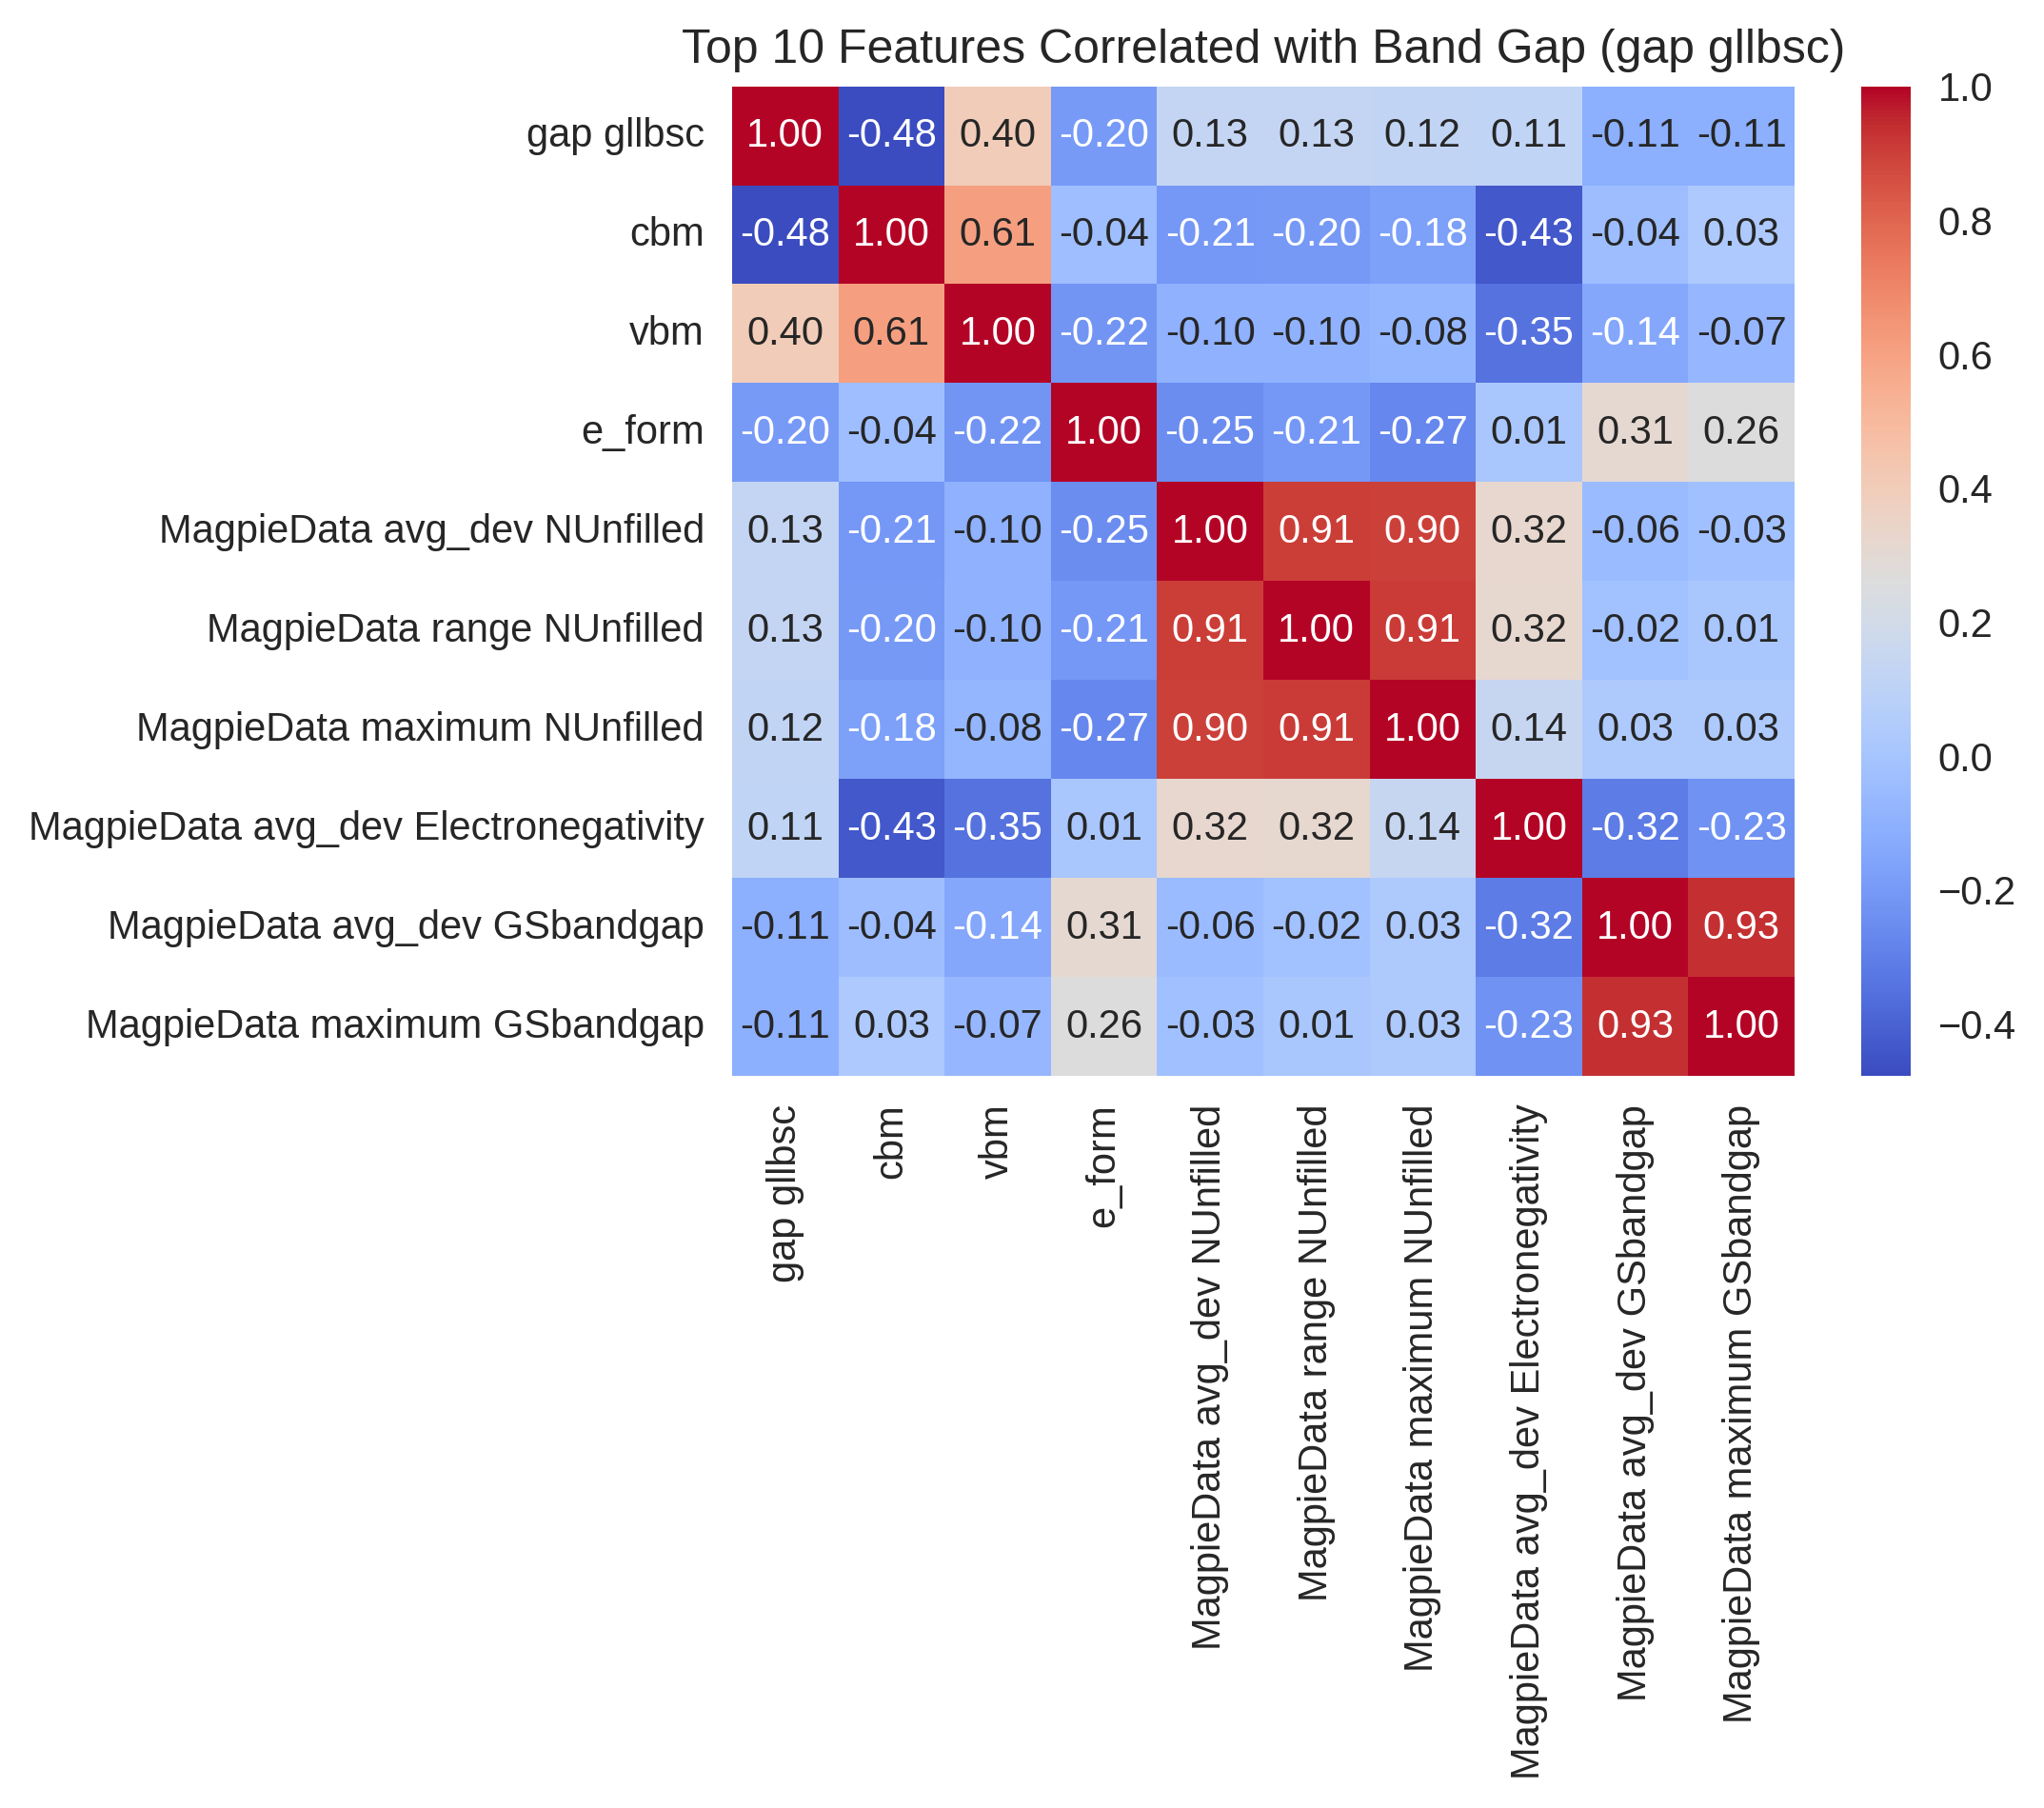

In [12]:
# Correlation heat map
import numpy as np

# Target variable.
target_col = "gap gllbsc"

# Obtain the absolute value of the correlation coefficient and select the top n correlations with the objective variable
top_n = 10
corr_with_target = df[numeric_cols].corr()[target_col].abs().sort_values(ascending=False)
top_features = corr_with_target.head(top_n).index.tolist()

df_top_features = df[top_features]

# Visualisation of correlation matrices (limited to upper-level features)
sns.heatmap(df_top_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Top {top_n} Features Correlated with Band Gap (gap gllbsc)")
plt.show()

In [13]:
# Select numeric columns only
num_cols = df_top_features.select_dtypes(include="number").columns

# Limit to 1000 samples as too many samples are heavy
sns.pairplot(df_top_features[num_cols].sample(1000, random_state=0))
plt.show()

In [14]:
# gap gllbsc ≈ cbm - vbm ?
diff = (df["cbm"] - df["vbm"])
is_equal = np.isclose(diff, df["gap gllbsc"])
print(f"完全一致: {is_equal.sum()} / {len(df)}")
print(f"差の統計: {np.abs(diff - df['gap gllbsc']).describe()}")

完全一致: 18193 / 18928
差の統計: count    18928.000000
mean         0.141639
std          0.919368
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.990000
dtype: float64


Fold 1 - MAE: 0.173, R²: 0.098
Fold 2 - MAE: 0.177, R²: 0.094
Fold 3 - MAE: 0.165, R²: 0.049
Fold 4 - MAE: 0.168, R²: 0.100
Fold 5 - MAE: 0.175, R²: 0.091

Average MAE: 0.172 ± 0.005
Average R²: 0.086 ± 0.019


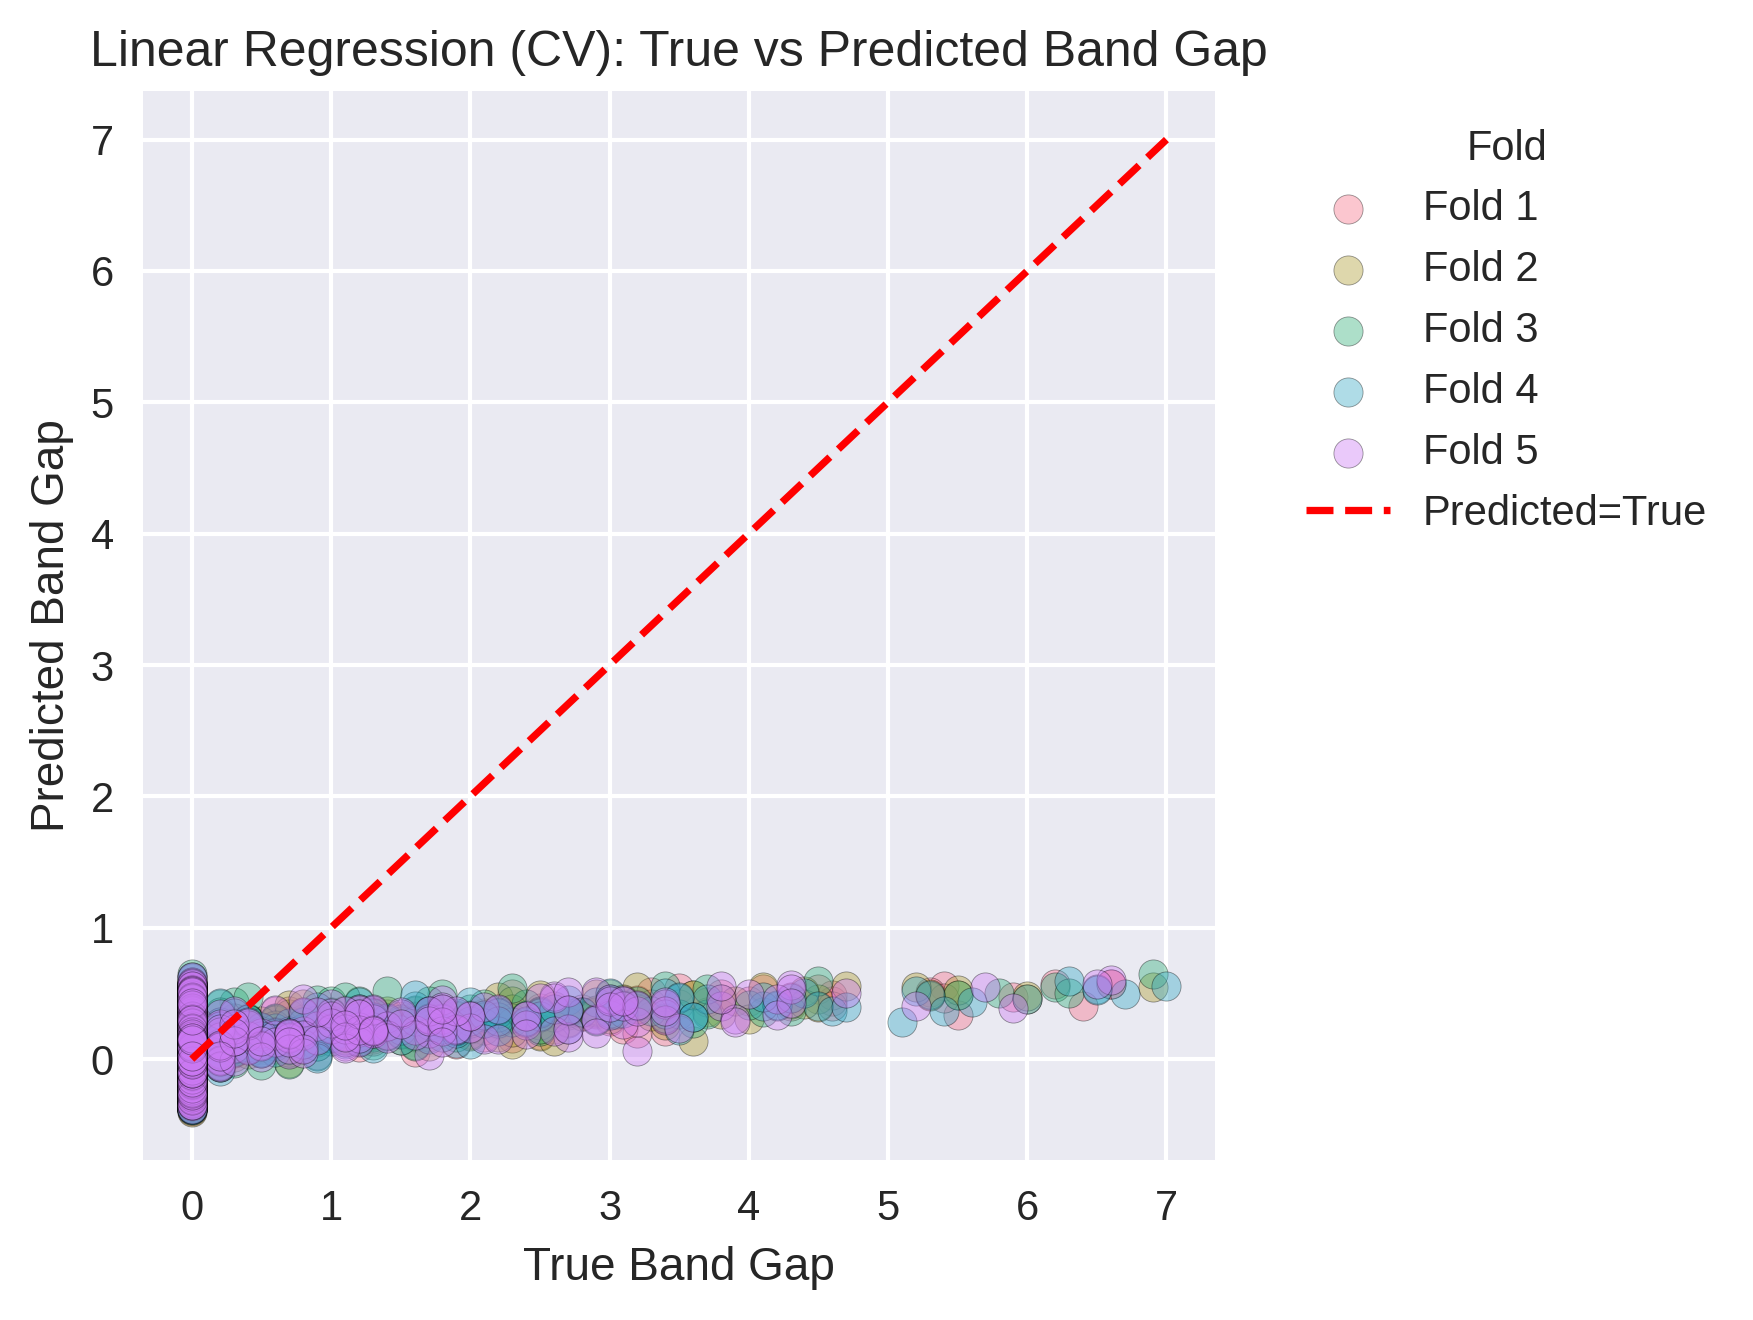

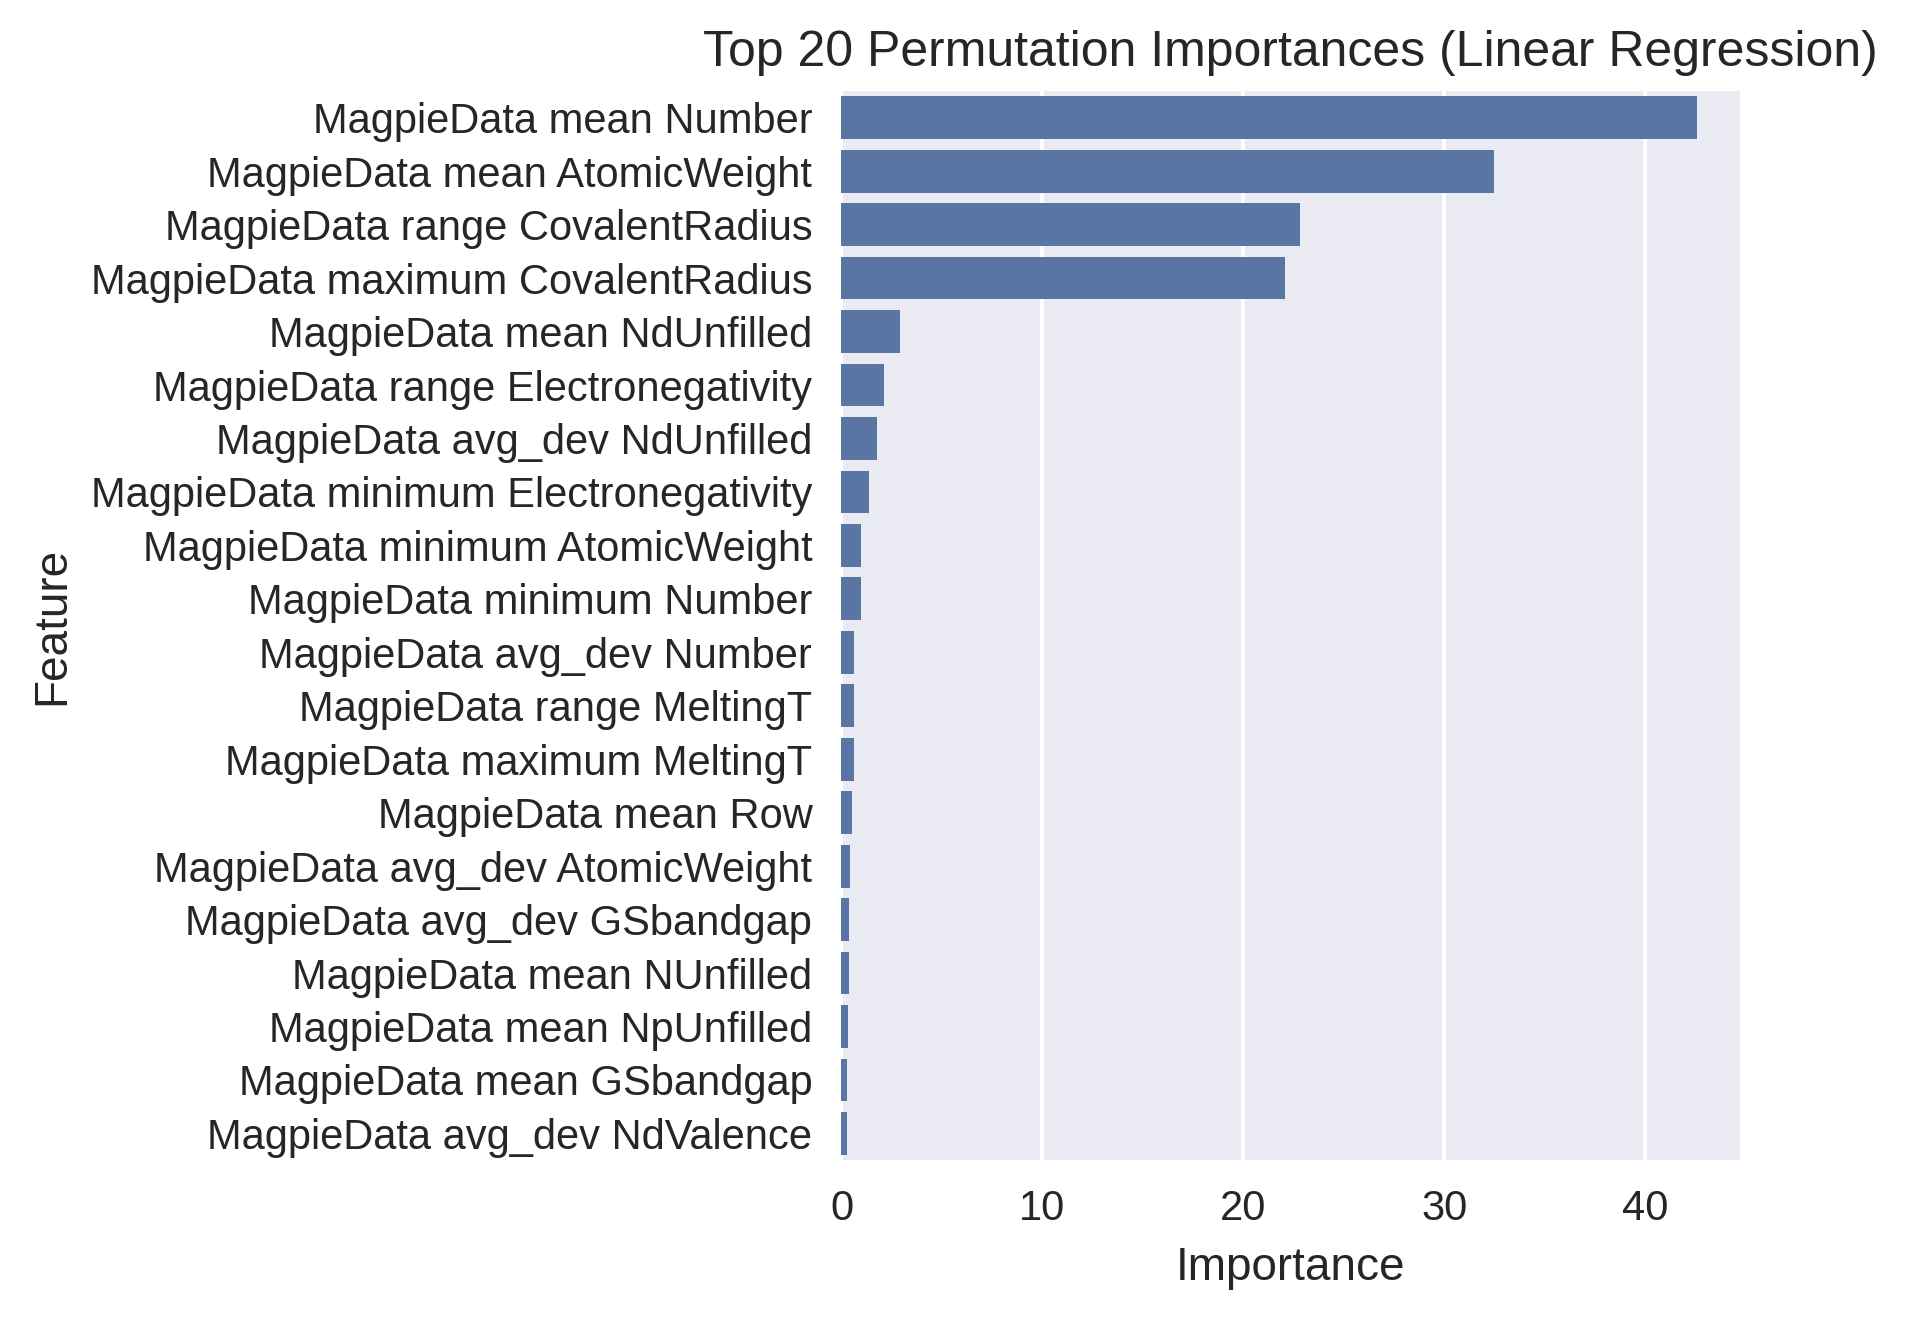

In [15]:
# Predicting the band gap by linear regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# # Predicting the band gap by linear regression with CV-based scatter plot & permutation importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definition of features and target variables
X = df.drop(columns=["gap gllbsc", "formula", "cbm", "vbm", "structure","composition"])
y = df["gap gllbsc"]
feature_names = X.columns

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preparing models and cross-validation
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# For saving results
y_true_all, y_pred_all, fold_ids = [], [], []
importances_list = []
mae_list, r2_list = [], []

# Color palette for folds
colors = sns.color_palette("husl", n_colors=cv.get_n_splits())

# CV loop
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled)):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)
    fold_ids.extend([fold] * len(y_val))  # Store fold info for each point

    # Score output
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mae_list.append(mae)
    r2_list.append(r2)
    print(f"Fold {fold+1} - MAE: {mae:.3f}, R²: {r2:.3f}")

    # Permutation importance (by val data)
    result = permutation_importance(model, X_val, y_val, n_repeats=5, random_state=42, n_jobs=-1)
    importances_list.append(result.importances_mean)

# Average score output
print(f"\nAverage MAE: {np.mean(mae_list):.3f} ± {np.std(mae_list):.3f}")
print(f"Average R²: {np.mean(r2_list):.3f} ± {np.std(r2_list):.3f}")

# Scatterplot with fold-wise color & legend
for fold in range(cv.get_n_splits()):
    indices = [i for i, f in enumerate(fold_ids) if f == fold]
    plt.scatter(
        np.array(y_true_all)[indices],
        np.array(y_pred_all)[indices],
        color=colors[fold],
        alpha=0.4,
        label=f"Fold {fold+1}",
        edgecolor='k',
        linewidth=0.2
    )
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], 'r--',label="Predicted=True")
plt.xlabel("True Band Gap")
plt.ylabel("Predicted Band Gap")
plt.title("Linear Regression (CV): True vs Predicted Band Gap")
plt.legend(title="Fold", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Permutation importance
avg_importance = np.mean(importances_list, axis=0)
imp_df = pd.DataFrame({"Feature": feature_names, "Importance": avg_importance})
imp_df = imp_df.sort_values("Importance", ascending=False).head(20)

sns.barplot(data=imp_df, x="Importance", y="Feature")
plt.title("Top 20 Permutation Importances (Linear Regression)")
plt.tight_layout()
plt.show()


Fold 1 - MAE: 0.064, R²: 0.696
Fold 2 - MAE: 0.071, R²: 0.627
Fold 3 - MAE: 0.064, R²: 0.530
Fold 4 - MAE: 0.062, R²: 0.704
Fold 5 - MAE: 0.065, R²: 0.624

Average MAE: 0.065 ± 0.003
Average R²: 0.636 ± 0.063


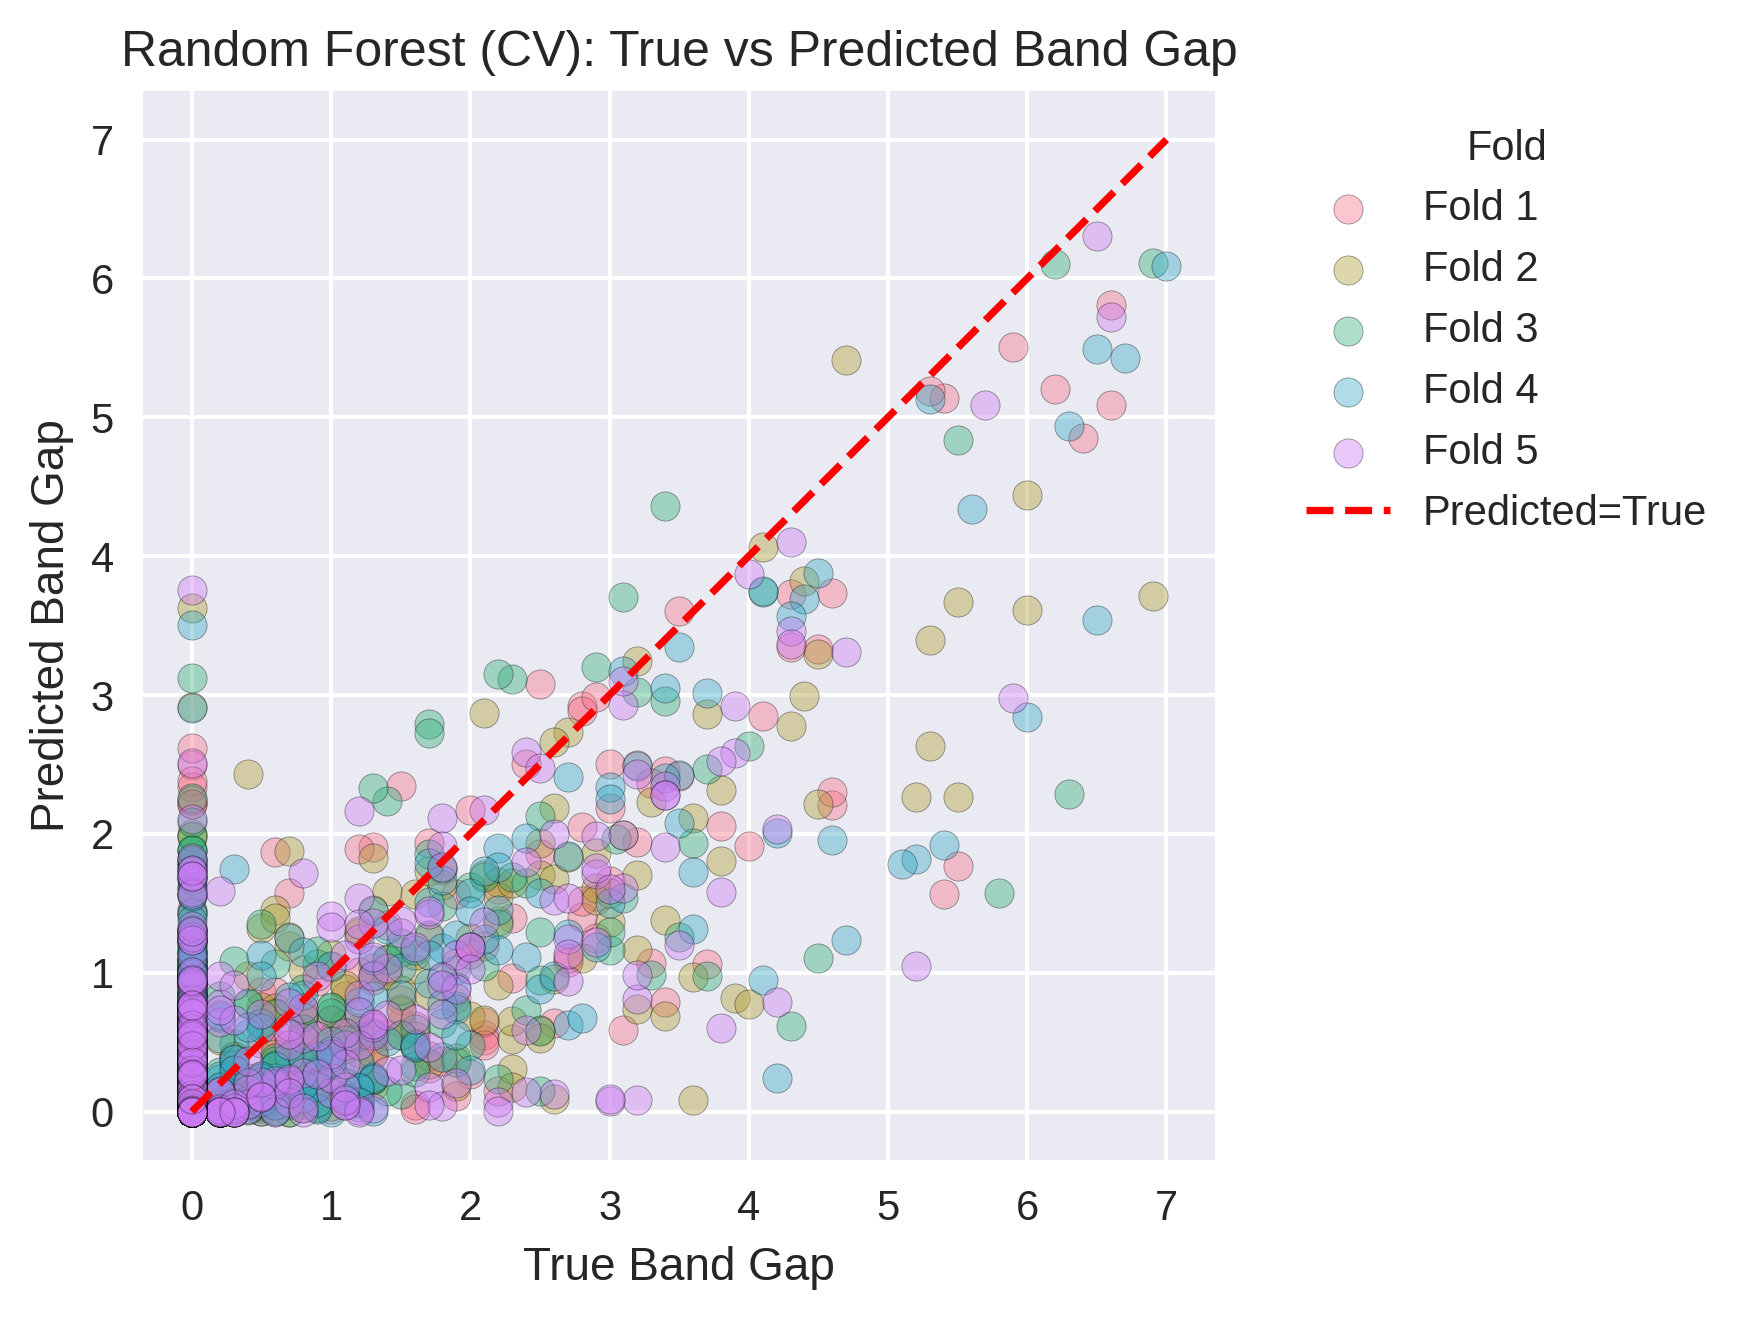

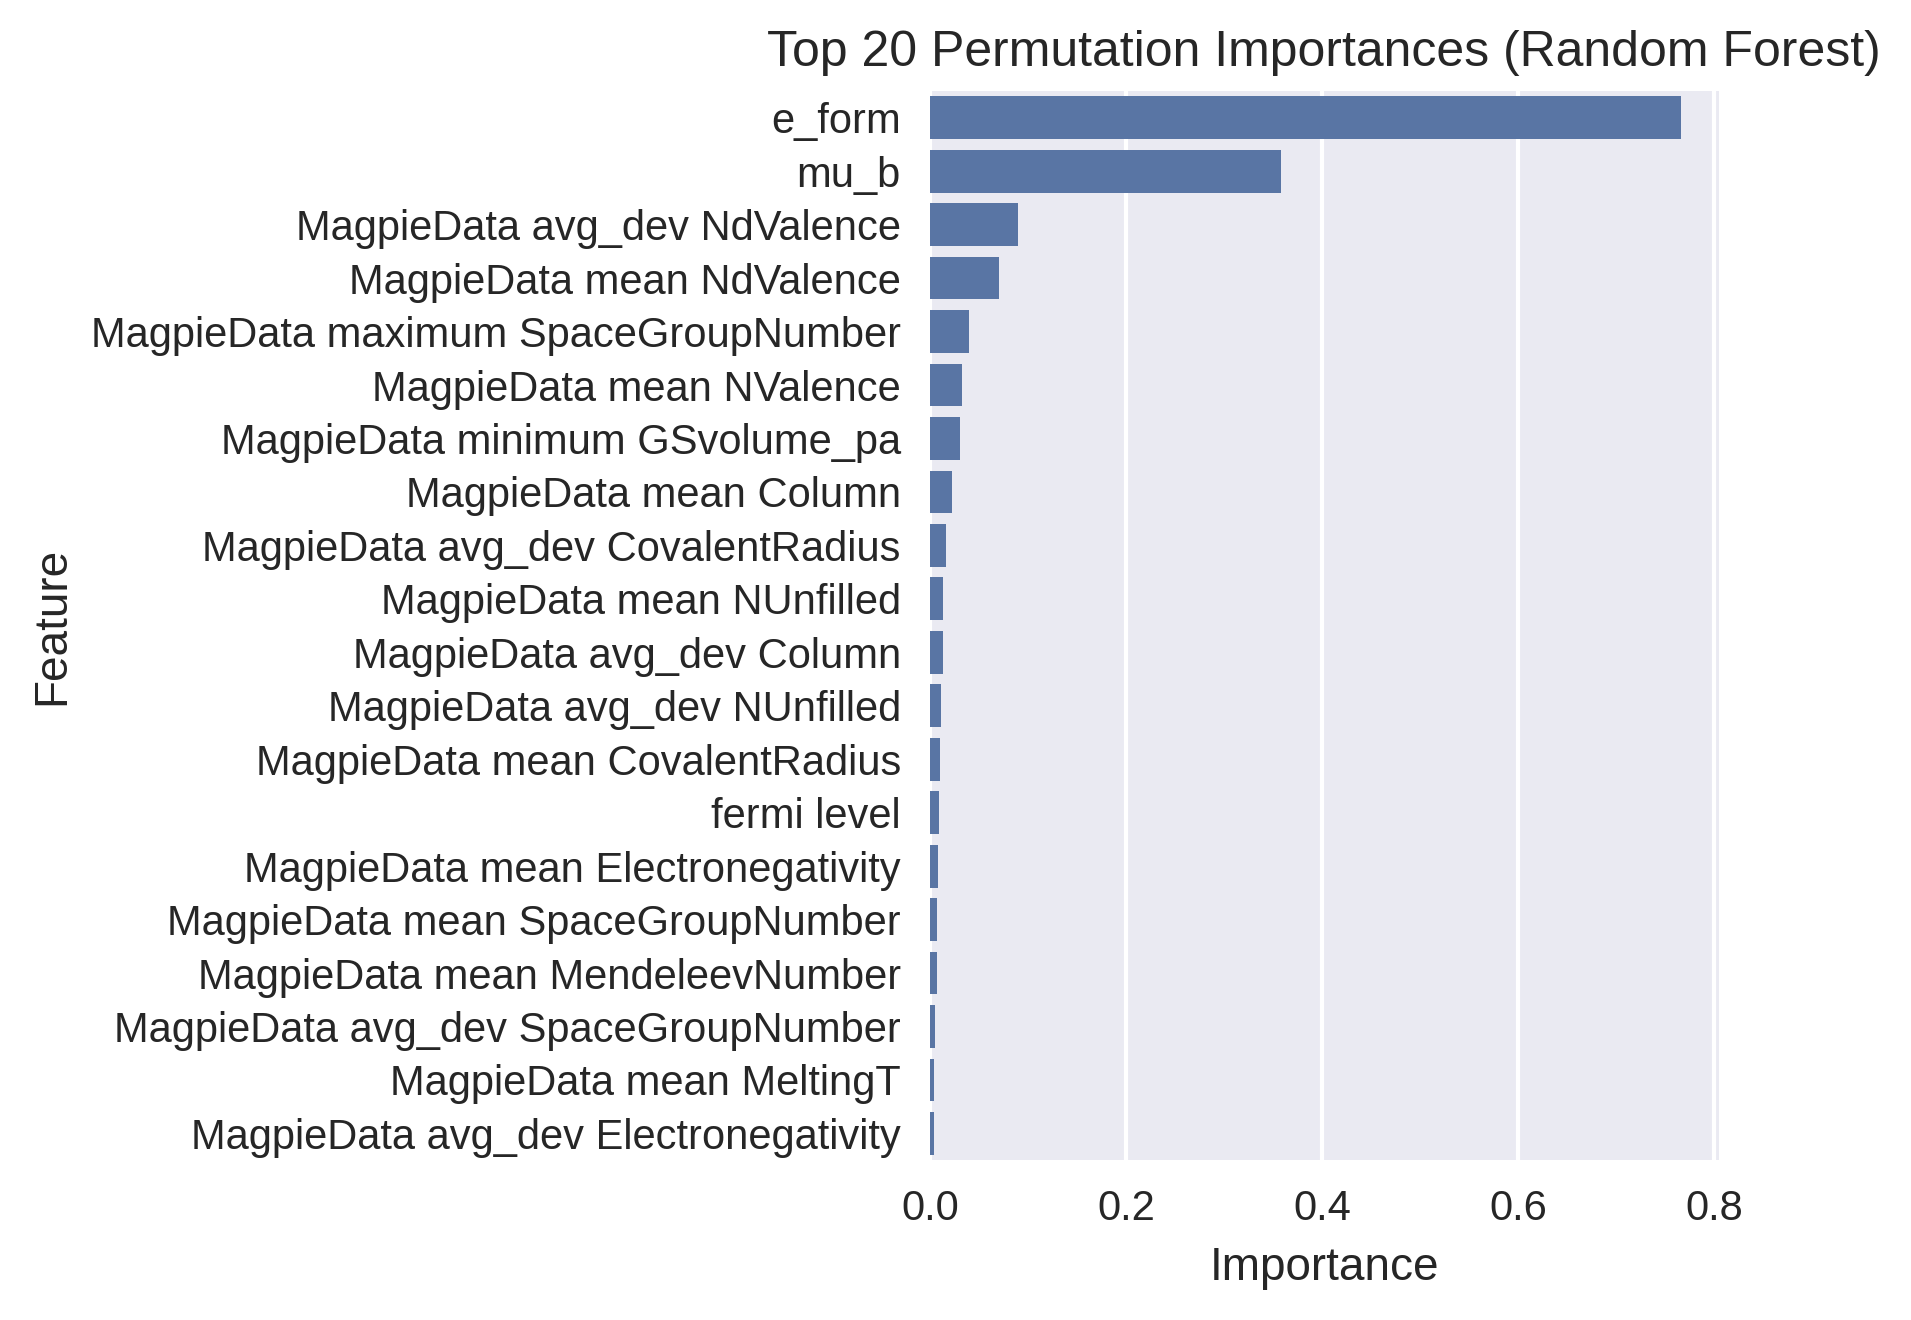

In [16]:
# Predicting the band gap by Random Forest with CV-based scatter plot & permutation importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definition of features and target variables
X = df.drop(columns=["gap gllbsc", "formula", "cbm", "vbm", "structure","composition"])
y = df["gap gllbsc"]
feature_names = X.columns

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preparing models and cross-validation
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# For saving results
y_true_all, y_pred_all, fold_ids = [], [], []
importances_list = []
mae_list, r2_list = [], []

# Color palette for folds
colors = sns.color_palette("husl", n_colors=cv.get_n_splits())

# CV loop
for fold, (train_idx, val_idx) in enumerate(cv.split(X_scaled)):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)
    fold_ids.extend([fold] * len(y_val))  # Store fold info for each point

    # Score output
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mae_list.append(mae)
    r2_list.append(r2)
    print(f"Fold {fold+1} - MAE: {mae:.3f}, R²: {r2:.3f}")

    # Permutation importance (by val data)
    result = permutation_importance(model, X_val, y_val, n_repeats=5, random_state=42, n_jobs=-1)
    importances_list.append(result.importances_mean)

# Average score output
print(f"\nAverage MAE: {np.mean(mae_list):.3f} ± {np.std(mae_list):.3f}")
print(f"Average R²: {np.mean(r2_list):.3f} ± {np.std(r2_list):.3f}")

# Scatterplot with fold-wise color & legend
for fold in range(cv.get_n_splits()):
    indices = [i for i, f in enumerate(fold_ids) if f == fold]
    plt.scatter(
        np.array(y_true_all)[indices],
        np.array(y_pred_all)[indices],
        color=colors[fold],
        alpha=0.4,
        label=f"Fold {fold+1}",
        edgecolor='k',
        linewidth=0.2
    )
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], 'r--',label="Predicted=True")
plt.xlabel("True Band Gap")
plt.ylabel("Predicted Band Gap")
plt.title("Random Forest (CV): True vs Predicted Band Gap")
plt.legend(title="Fold", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Permutation importance
avg_importance = np.mean(importances_list, axis=0)
imp_df = pd.DataFrame({"Feature": feature_names, "Importance": avg_importance})
imp_df = imp_df.sort_values("Importance", ascending=False).head(20)

sns.barplot(data=imp_df, x="Importance", y="Feature")
plt.title("Top 20 Permutation Importances (Random Forest)")
plt.tight_layout()
plt.show()
